In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle
from scipy.stats import norm
from scipy import stats
#%matplotlib notebook


[5000, 7500]
[5000, 6000]
[8000, 10000]
[8000, 9000]
[7000, 8000]


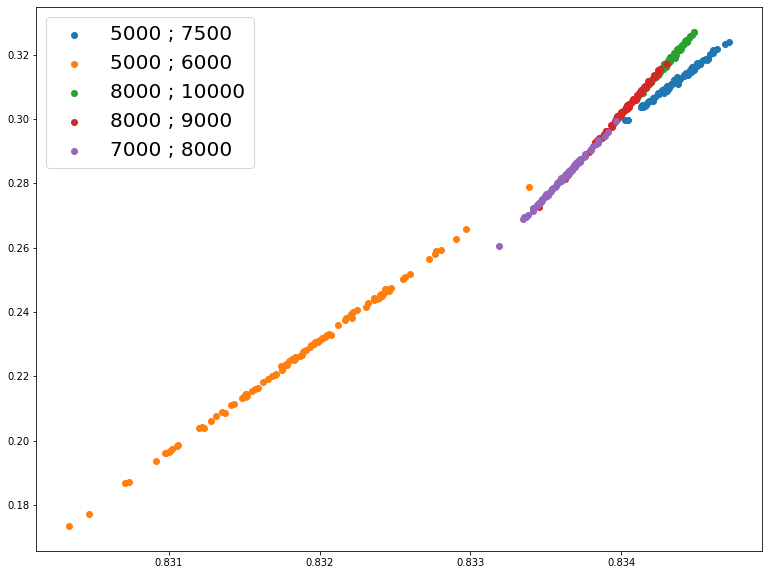

In [2]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 7500], [5000, 6000], [8000, 10000], [8000,9000], [7000, 8000]]

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    
    
    J_plot = [] 
    J_l =  np.unique(data_l1[:, 1])
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(100):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = []         
        for J in J_l :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l, np.ones(len(J_l))]).T
        #print(A.shape)
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
        
    ax.scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    
    
plt.legend(fontsize=20)    

[5000, 7500]
[5000, 6000]
[8000, 10000]


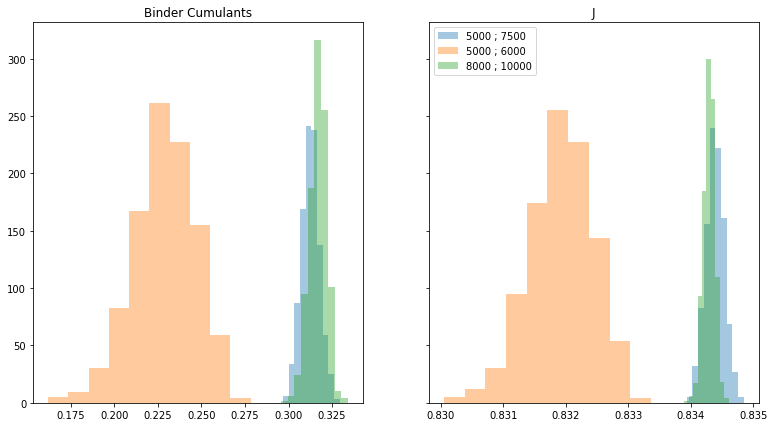

In [3]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 7500], [5000, 6000], [8000, 10000]]

fig, axs = plt.subplots(1,  2, figsize=(13, 7), sharey=True)
axs[0].set_title("Binder Cumulants")
axs[1].set_title("J")
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    
    
    J_plot = [] 
    J_l =  np.unique(data_l1[:, 1])
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(1000):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = []         
        for J in J_l :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l, np.ones(len(J_l))]).T
        #print(A.shape)
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
        
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    
    axs[0].hist(crit_bc, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    axs[1].hist(crit_J, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    
plt.legend()  

[5000, 7500]
[5000, 6000]
[8000, 10000]
[8000, 9000]
[7000, 8000]


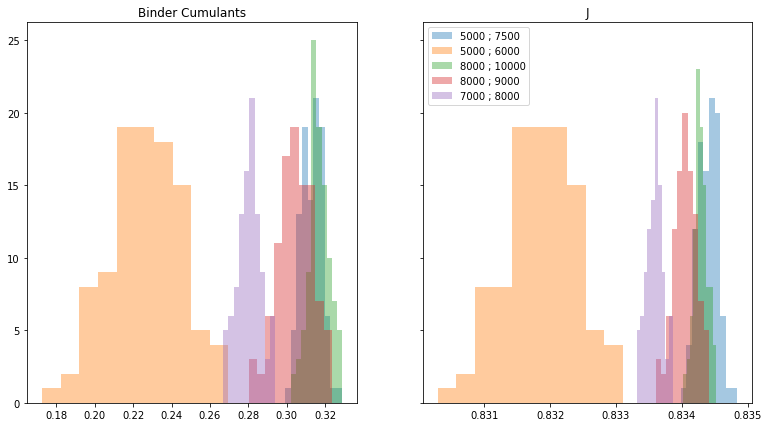

In [4]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 7500], [5000, 6000], [8000, 10000], [8000,9000], [7000, 8000]]

fig, axs = plt.subplots(1,  2, figsize=(13, 7), sharey=True)
axs[0].set_title("Binder Cumulants")
axs[1].set_title("J")
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
    
    
    J_plot = [] 
    J_l =  np.unique(data_l1[:, 1])
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(100):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = []         
        for J in J_l :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l, np.ones(len(J_l))]).T
        #print(A.shape)
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
        
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    
    axs[0].hist(crit_bc, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    axs[1].hist(crit_J, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    
plt.legend() 

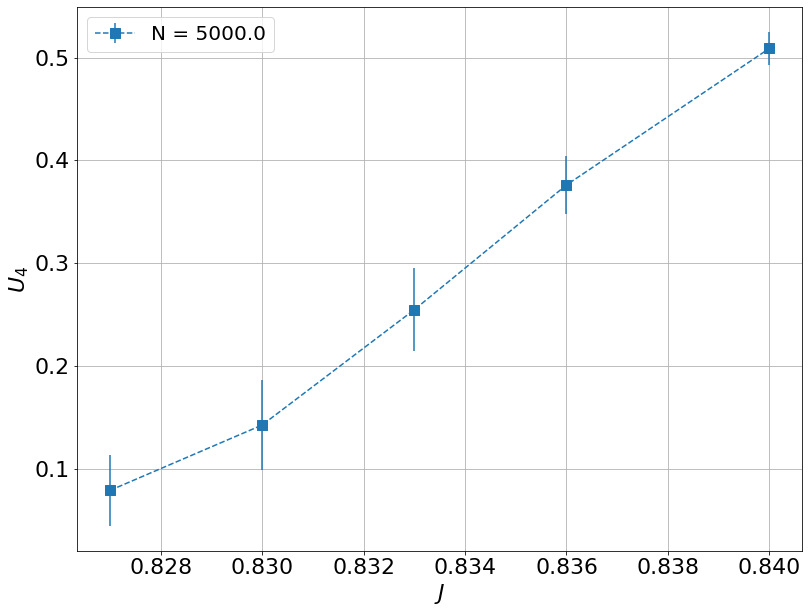

In [5]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

for l in lengths:
    #if (l>9000):
    #    continue
        
        
    data_l1 = data_np[data_np[:,0]==l]
    
    J_plot = []#data_l[:, 1]
    J_l =  np.unique(data_l1[:, 1])
    
    bc = []
    errs=[]
    
    for J in J_l :
        
        data_l = data_l1[data_l1[:,1]==J]
        
        ind = np.argmin(data_l[:, 16])
        
        data_l = data_l[ind, :]
 
        
        m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
        m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
 
        cum = 1 - m4/3/m2/m2
 
        
        mean = np.mean(cum)
        
        err=np.std(cum) 
        bc.append(mean)
        errs.append(err)

    if (l!=5000):
        continue
    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))   
    
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.6)

plt.grid()

plt.legend(loc="best", fontsize=20)

#plt.savefig("/home/kamilla/Lattice_models/img/bc_mainplot.png")

[5000, 7500]
[5000, 6000]
[8000, 10000]
[8000, 9000]
[7000, 8000]
[7000, 7500]


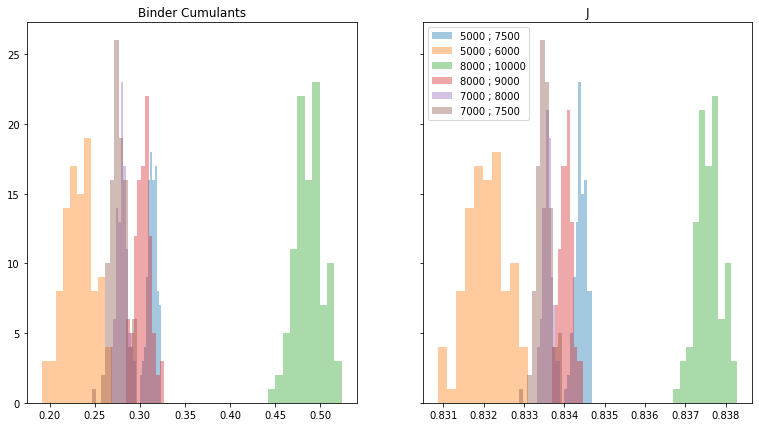

In [6]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 7500], [5000, 6000], [8000, 10000], [8000,9000], [7000, 8000], [7000, 7500]]

fig, axs = plt.subplots(1,  2, figsize=(13, 7), sharey=True)
axs[0].set_title("Binder Cumulants")
axs[1].set_title("J")
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
 
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(100):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        
        A = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
        
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    
    axs[0].hist(crit_bc, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    axs[1].hist(crit_J, alpha =0.4, label = str(pair[0])+ " ; " +str(pair[1]) )
    
    
plt.legend() 

In [7]:
import seaborn as sns 

[5000, 2000]
[5000, 3000]
[5000, 7000]
[5000, 7500]
[5000, 8000]
[5000, 9000]
[5000, 10000]


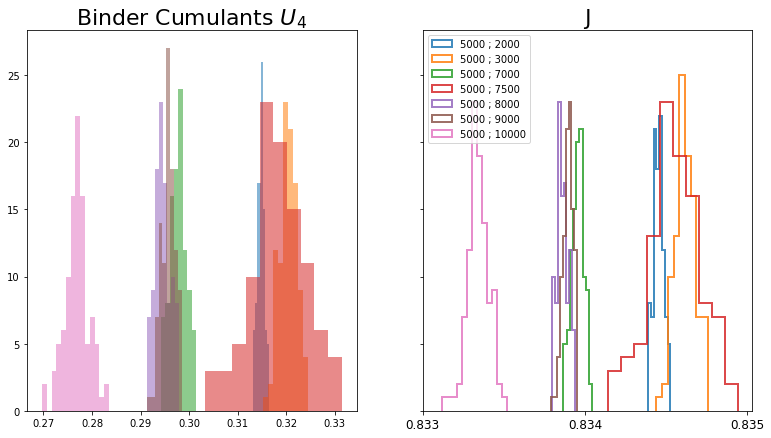

In [8]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

J_min = 0.826
J_max = 0.841
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 2000], [5000, 3000], [5000, 6000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]

#no 5000-6000
pairs = [[5000, 2000], [5000, 3000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]

fig, axs = plt.subplots(1,  2, figsize=(13, 7), sharey=True)
axs[0].set_title("Binder Cumulants " + r"$U_4$", fontsize=22)
axs[1].set_title("J",fontsize=22)
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
 
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(100):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        
        A = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
        
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    
    axs[0].hist(crit_bc, alpha =0.54, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'barstacked',stacked=True  ) #density=True 
    
    axs[1].hist(crit_J, alpha =0.84, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'step',linewidth=2,stacked=True   ) #density=True 
    
axs[0].set_xlim()

axs[1].set_xticks([ 0.833,  0.834, 0.835]) 
axs[1].set_xticklabels([  0.833,  0.834, 0.835], fontsize=12)
plt.legend() 

In [9]:
#sns.color_palette("tab10")
#sns.color_palette("Paired")

custom_palette = sns.color_palette("Paired", 9)
 

[5000, 1000]
[5000, 2000]
[5000, 3000]
[5000, 7000]
[5000, 7500]
[5000, 8000]
[5000, 9000]
[5000, 10000]


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

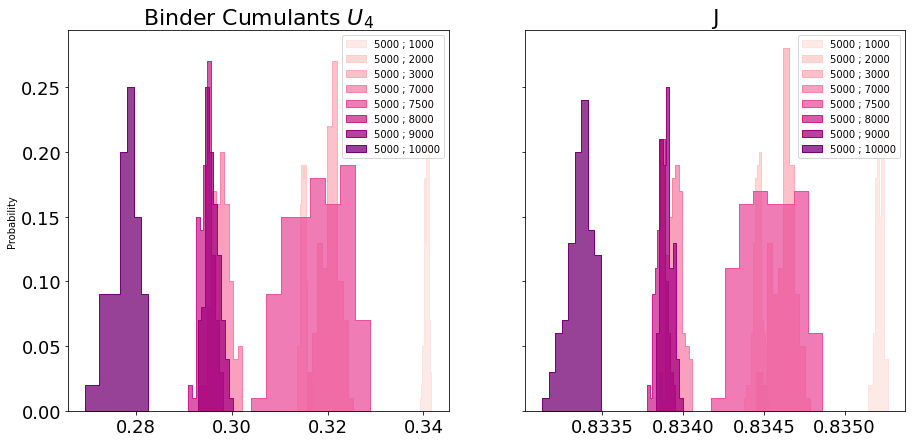

In [18]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
data_np = np.vstack((data_np, data_np1))

J_min = 0.826
J_max = 0.841
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 2000], [5000, 3000], [5000, 6000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]

#no 5000-6000
pairs = [[5000, 1000], [5000, 2000], [5000, 3000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]

fig, axs = plt.subplots(1,  2, figsize=(15, 7), sharey=True)
axs[0].set_title("Binder Cumulants " + r"$U_4$", fontsize=22)
axs[1].set_title("J",fontsize=22)
c = 0 
custom_palette =sns.color_palette("RdPu",  len(pairs)) #sns.color_palette("Paired", len(pairs))
#sns.set_palette("Paired")
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
 
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(100):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_1 = 1 - m4/3/m2/m2
            bc_1.append(np.mean(cum_1))
            errs_1.append(np.std(cum_1))

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 16])
            data_l = data_l[ind, :]
            m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            cum_2 = 1 - m4/3/m2/m2
            bc_2.append(np.mean(cum_2))
            errs_2.append(np.std(cum_2))
            
        #print(J_l, cum_1)
        A = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A, bc_1, rcond=None)[0]
        
        A = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A, bc_2, rcond=None)[0]
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
     
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
 
    sns.histplot(data=crit_bc,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[0], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    #axs[0].hist(crit_bc, alpha =0.54, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'barstacked',stacked=True  ) #density=True 
    #sns.kdeplot(data=crit_bc, label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[0] )
    #axs[1].hist(crit_J, alpha =0.84, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'step',linewidth=2,stacked=True   ) #density=True 
    #sns.kdeplot(data=crit_J, label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[1] )
    sns.histplot(data=crit_J,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[1], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    c+=1
    #axs[0].set_xlim()
    
 
 

#axs[1].set_xticks([ 0.833,  0.834, 0.835]) 
#axs[1].set_xticklabels([  0.833,  0.834, 0.835], fontsize=12)
axs[0].legend()
axs[1].legend() 
axs[0].tick_params(axis='x', labelsize=18) 
axs[0].tick_params(axis='y', labelsize=18) 
axs[1].tick_params(axis='x', labelsize=18) 
axs[1].tick_params(axis='y', labelsize=18) 
axs[0].ylabel("Probability", fontsize=18)
#https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot
plt.savefig("/home/kamilla/Lattice_models/img/cumulants_hist.png")